In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

In [8]:
root = 'df_ARG_industry.csv'

df_ARG = pd.read_csv(root, parse_dates=True, )
df_ARG.head()

,year,investment,country,industry
0,1993,16.84,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI..."
1,1993,264.82,ARGENTINA,03 PESCA Y ACUICULTURA
2,1993,1828.28,ARGENTINA,20 INDUSTRIA QUÍMICA
3,1993,192.21,ARGENTINA,21 FABRICACIÓN DE PRODUCTOS FARMACÉUTICOS
4,1993,4.51,ARGENTINA,23 FABRICACIÓN DE OTROS PRODUCTOS MINERALES NO...


In [9]:
df_ARG.dtypes

year            int64
investment    float64
country        object
industry       object
dtype: object

Text(0.5, 1.0, 'Inversión total ARGENTINA')

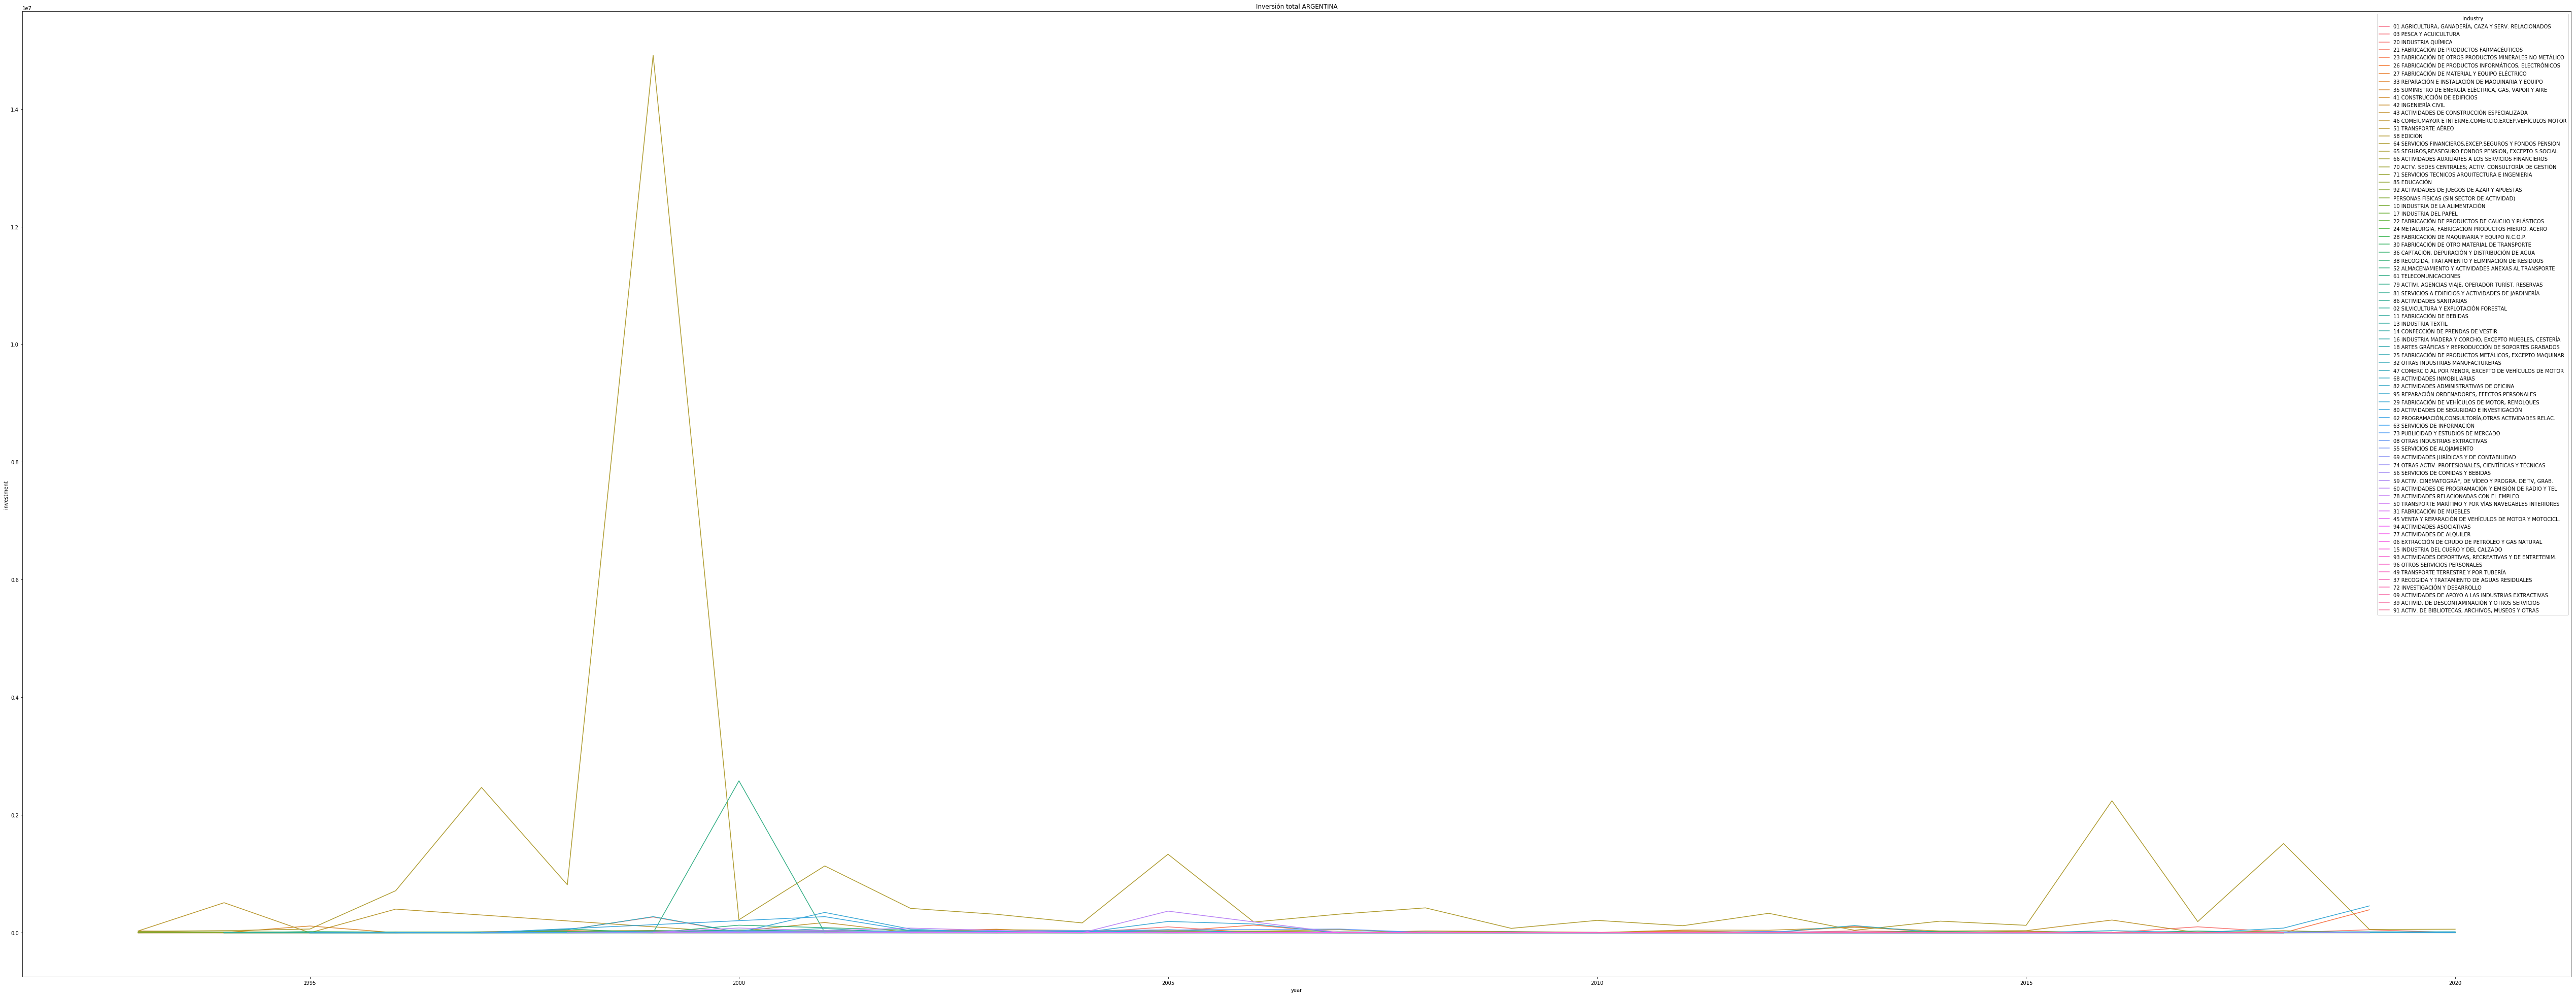

In [16]:
plt.figure(figsize=(90,35))
sns.lineplot(data=df_ARG, x='year', y='investment', hue='industry')
plt.title('Inversión total ARGENTINA')

In [14]:
df_ARG['investment'].max()

14912695.91

In [19]:
df_ARG.loc[df_ARG['investment'] == 14912695.91]

,year,investment,country,industry
235,1999,14912695.91,ARGENTINA,"64 SERVICIOS FINANCIEROS,EXCEP.SEGUROS Y FONDO..."


In [44]:
# visualmente se aprecia que es una serie no estacionaria


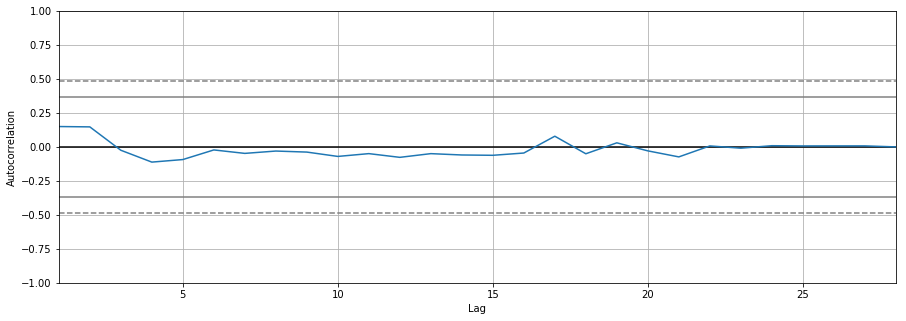

In [5]:
plt.figure(figsize=(15,5))

autocorrelation_plot(df_ARG)
plt.show()

In [6]:
df_ARG.index = df_ARG.index.to_period('Y')


In [7]:
df_ARG.head()

,investment
year,
1993,122415.35
1994,581152.83
1995,229211.55
1996,1179473.44
1997,2547275.12


In [16]:
df_ARG.describe()

,investment
count,2.800000e+01
mean,1.430458e+06
std,2.932751e+06
min,1.059626e+05
25%,2.688315e+05
50%,5.311048e+05
75%,1.315187e+06
max,1.570630e+07


In [10]:
x = df_ARG

arima_model = ARIMA(x, order=(2,0,0))


In [11]:
model_fit = arima_model.fit() 

In [12]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:             investment   No. Observations:                   28
Model:                     ARMA(2, 0)   Log Likelihood                -455.649
Method:                       css-mle   S.D. of innovations        2823027.420
Date:                Tue, 04 May 2021   AIC                            919.298
Time:                        15:49:55   BIC                            924.627
Sample:                    12-31-1993   HQIC                           920.927
                         - 12-31-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.43e+06      7e+05      2.043      0.041    5.85e+04     2.8e+06
ar.L1.investment     0.1285      0.184      0.697      0.486      -0.233       0.490
ar.L2.investment     0.1220 

In [15]:
#Plot residual errors

residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

NameError: name 'DataFrame' is not defined

In [65]:
residuals.plot(kind='kde')
plt.show()

NameError: name 'residuals' is not defined

In [66]:
print(residuals.describe())

NameError: name 'residuals' is not defined

In [17]:
# split into train and test sets
X = df_ARG.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [39]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(20,0,0))  #(5,0,0) #(2,0,0)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=778321.940199, expected=275058.750000
predicted=811925.838568, expected=456467.700000
predicted=898768.239356, expected=434634.920000
predicted=666457.792954, expected=305650.190000
predicted=1124141.832334, expected=237445.420000
predicted=1423332.595665, expected=2517316.160000
predicted=1060946.590098, expected=373771.790000
predicted=1511262.277222, expected=1678515.580000
predicted=1442912.934304, expected=979672.920000
predicted=637511.466719, expected=105962.640000


In [42]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

ValueError: Found input variables with inconsistent numbers of samples: [10, 61]

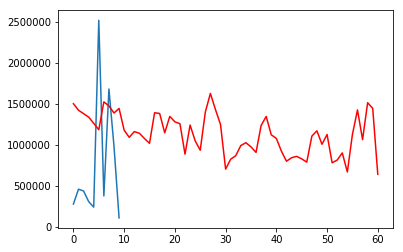

In [43]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()